In [3]:
from util_comp import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import time

from sklearn.model_selection import train_test_split


# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame(main(one_hot=True))
print(df.shape)
df.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 3 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 56 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 3 minutes and 14 seconds
(44535, 430)


,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A woman,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_None,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_1000 to 4999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_5000 employees and more,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_None,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_None,)","(Q9- Are you working?_Part time,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_None,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12- Do you work most often?_In a workshop, a technical room,)","(Q12- Do you work most often?_In an office alone or in pairs,)","(Q12-

In [5]:
data = df

# Split the data for training and evaluation
# X: features with the outcome column removed, where outcome is 0 or 1
# y: outcome column

# get the rows withs outcome 0 or 1
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome', axis=1, inplace=False)
X.columns = [str(i) for i in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train, X_test,score_func, k):
 fs = SelectKBest(score_func, k=k)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

### Chi Sq

Feature 0: 1.832396
Feature 1: 69.335076
Feature 2: 166.177314
Feature 3: 246.188361
Feature 4: 18.395946
Feature 5: 136.436597
Feature 6: 77.085306
Feature 7: 3.777236
Feature 8: 75.051189
Feature 9: 72.401336
Feature 10: 77.813476
Feature 11: 0.034336
Feature 12: 3.821871
Feature 13: 0.000134
Feature 14: 52.791420
Feature 15: 36.939867
Feature 16: 7.778719
Feature 17: 46.945047
Feature 18: 0.016057
Feature 19: 1.402251
Feature 20: 0.063549
Feature 21: 13.536127
Feature 22: 4.349277
Feature 23: 3.027103
Feature 24: 0.885057
Feature 25: 4.680837
Feature 26: 52.897481
Feature 27: 56.875604
Feature 28: 11.067978
Feature 29: 51.836796
Feature 30: 43.502972
Feature 31: 0.255090
Feature 32: 1.281758
Feature 33: 8.286725
Feature 34: 0.339437
Feature 35: 0.007308
Feature 36: 3.340650
Feature 37: 11.944268
Feature 38: 5.268580
Feature 39: 1.002758
Feature 40: 22.342716
Feature 41: 3.040191
Feature 42: 11.547432
Feature 43: 0.339437
Feature 44: 2.700703
Feature 45: 42.103139
Feature 46: 17.1685

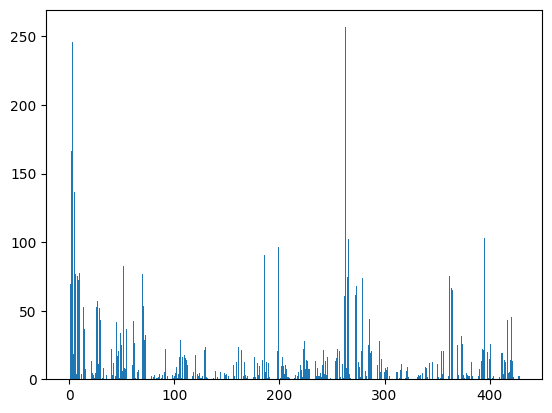

In [7]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.savefig('outputs/00_feature_select/feat_imp_chi2.png')
plt.show()


In [8]:
# get the scores for the features and remove the nan values
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
min_chi2_imp = min(scores)
max_chi2_imp = max(scores)
print(f"min: {min_chi2_imp}")
print(f"max: {max_chi2_imp}")

min: 0.0001336211450283463
max: 256.625214241463


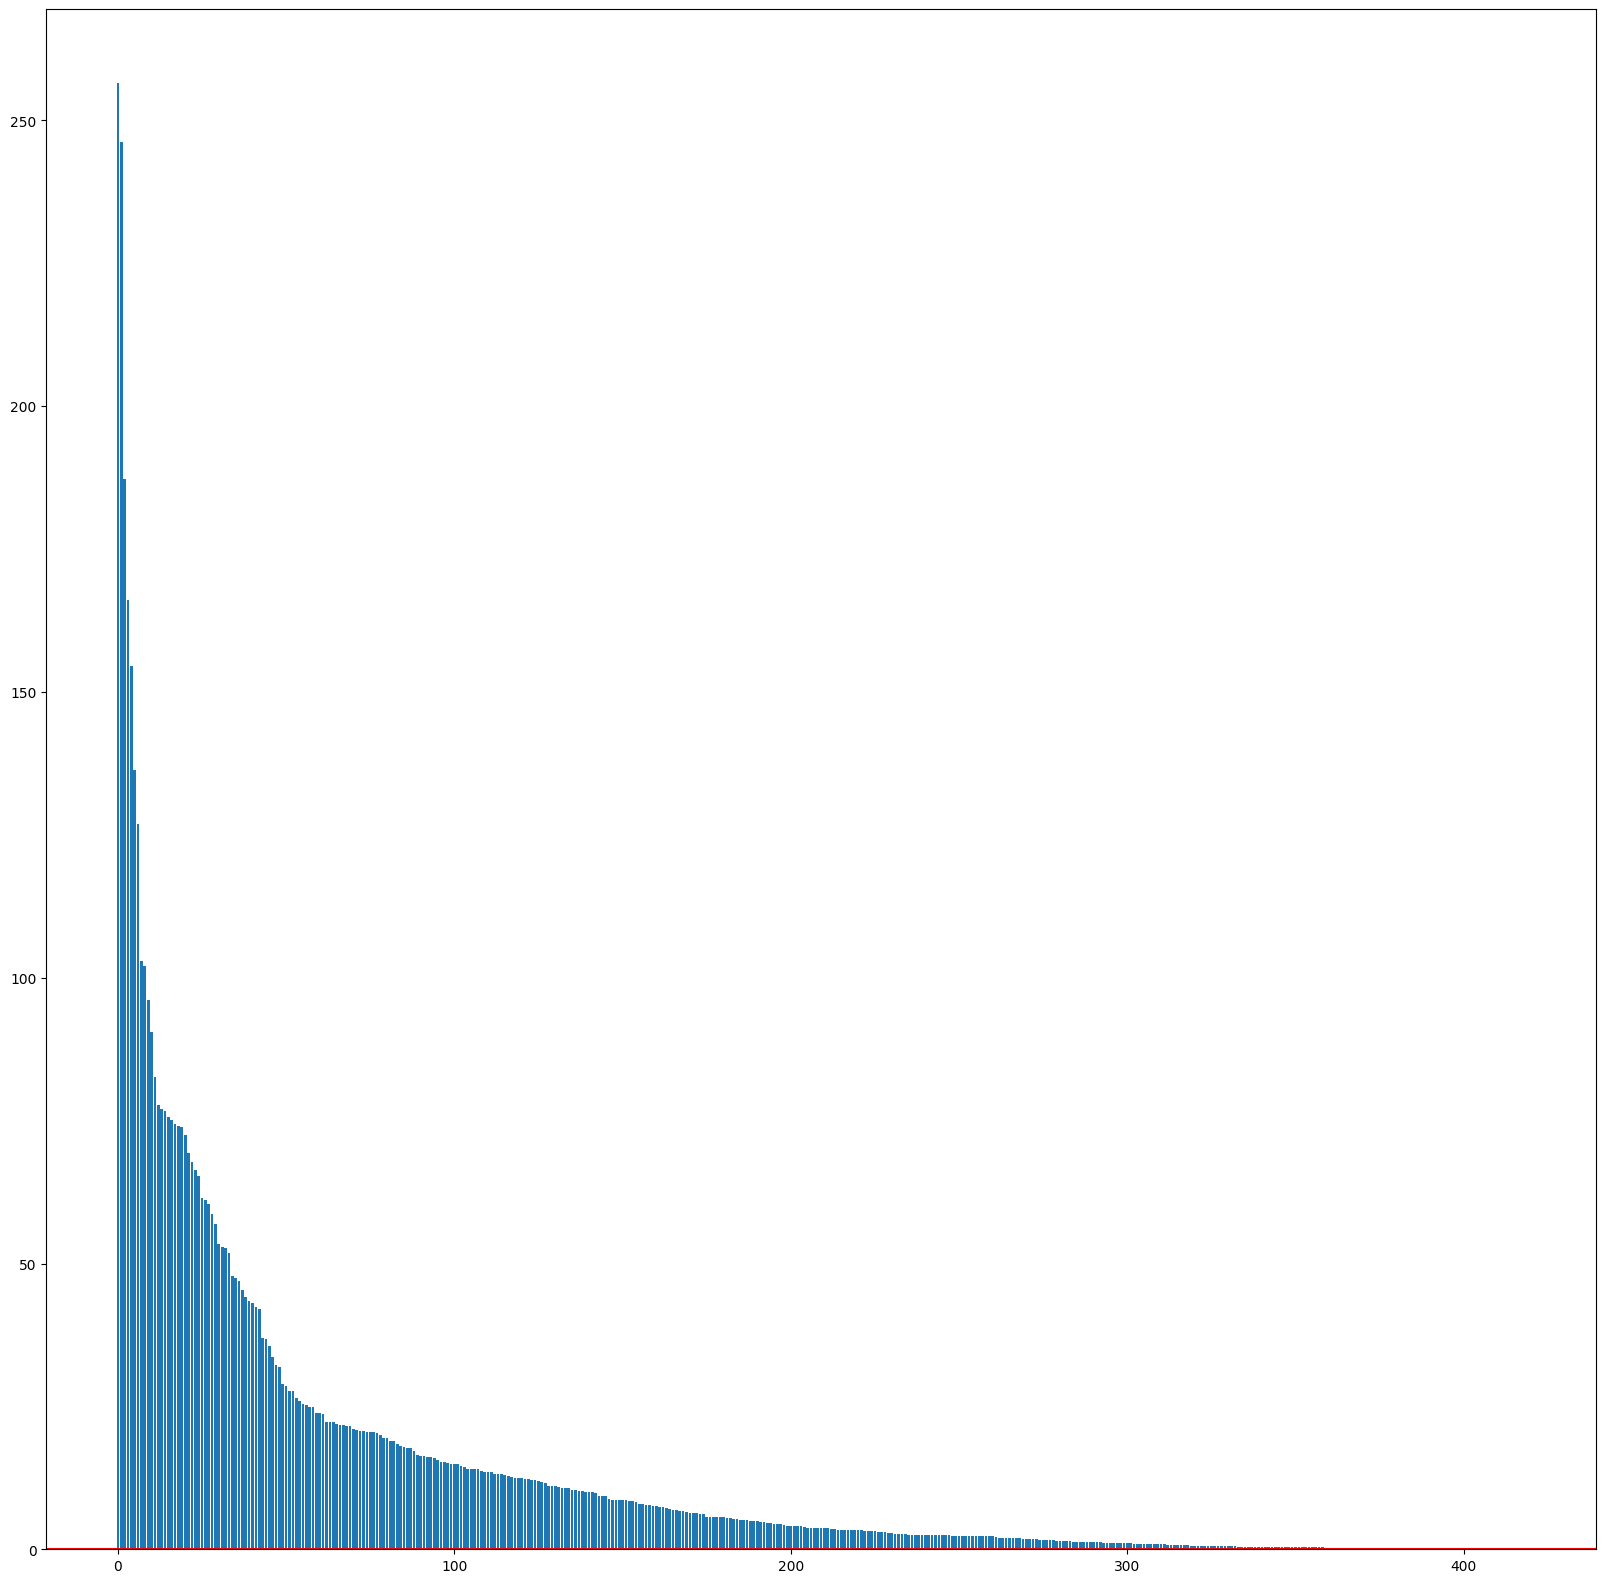

number of features with scores above the threshold_chi2: 419


In [9]:
# sort the scores in descending order
scores.sort(reverse=True)

# get the threshold_chi2

threshold_chi2 = 0
# plot the scores
# draw a vertical line at the threshold_chi2
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
plt.axhline(y=threshold_chi2, color='r', linestyle='-')
plt.savefig('outputs/00_feature_select/feat_imp_chi2_sorted.png')
plt.show()

# get the number of features with scores above the threshold_chi2

num_features = len([i for i in scores if i > threshold_chi2])
print(f"number of features with scores above the threshold_chi2: {num_features}")


In [10]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)

In [11]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4661411121526587 
test accuracy: 0.8531 
train accuracy: 0.9999 
ROAUC: 0.6911995240991242 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.47      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 6 seconds
average test accuracy: 0.8531398189395027


In [12]:
# difference between the max and threshold scores
range_chi2 =  max_chi2_imp - threshold_chi2
print(f"Range: {range_chi2}")

Range: 256.625214241463


In [13]:
accuracy_scores = []
prev_num_features = 0
for i in range(1001):
    print(f"{i}:\n")
    threshold_itr = threshold_chi2 + round((range_chi2 * i / 1000), 4)
    print(f"Threshold: {threshold_itr}")
    num_features_itr = len([sc for sc in scores if sc > threshold_itr])
    print(f"number of features with scores above the threshold: {num_features_itr}")
    if prev_num_features != num_features_itr:
        prev_num_features = num_features_itr
    else:
        continue
    if num_features_itr == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features_itr)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold_itr,np.mean(test_accuracies),num_features_itr))

0:

Threshold: 0.0
number of features with scores above the threshold: 419
Forest 1/2 trained with 
F1 score: 0.4661411121526587 
test accuracy: 0.8531 
train accuracy: 0.9999 
ROAUC: 0.6911995240991242 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.47      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 5 seconds
Forest 2/2 trained with 
F1 score: 0.465142948587193 
test accuracy: 0.8530 
train accuracy: 1.0000 
ROAUC: 0.692020000432995 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.47      6959
we

In [14]:
list_th_chi2 = [i[0] for i in accuracy_scores]
list_ac_chi2 = [i[1] for i in accuracy_scores]
list_num_feat_chi2 = [i[2] for i in accuracy_scores]

In [15]:
# the min of accuracy or number of features
min_ac_chi2 = min(list_ac_chi2)
min_num_feat_chi2 = min(list_num_feat_chi2)
min_pt = min(min_ac_chi2, min_num_feat_chi2)
# the max of accuracy or number of features
max_ac_chi2 = max(list_ac_chi2)
max_num_feat_chi2 = max(list_num_feat_chi2)
max_pt = max(max_ac_chi2, max_num_feat_chi2)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_chi2 = min(list_th_chi2)
max_th_chi2 = max(list_th_chi2)

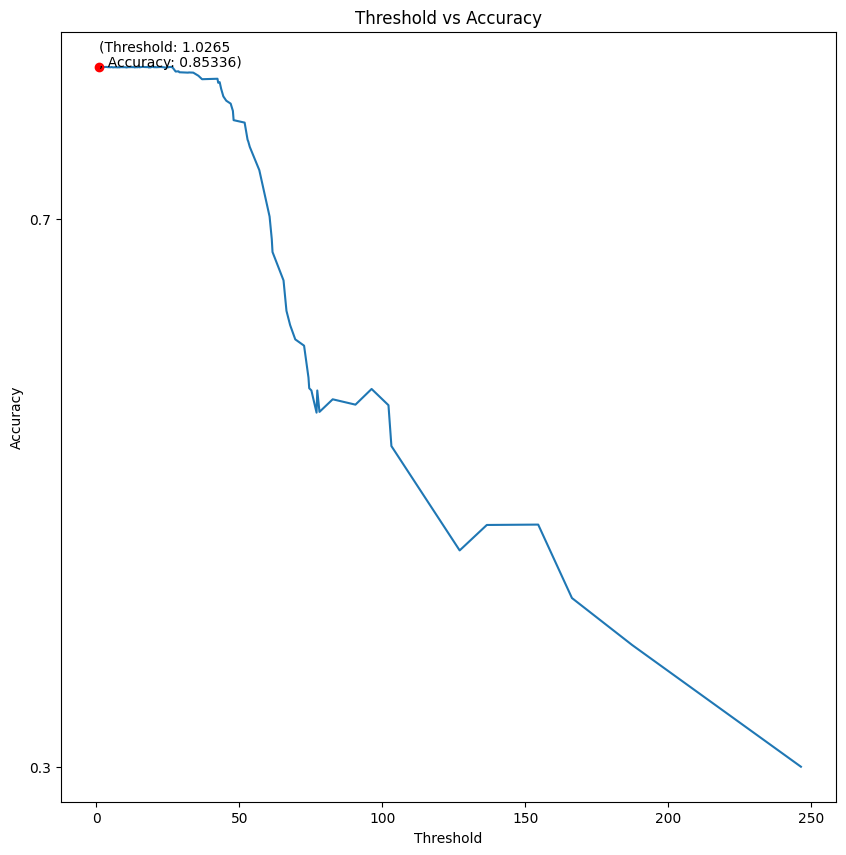

In [16]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot(list_th_chi2, list_ac_chi2)
plt.yticks(np.arange(min_pt, max_pt + (max_pt * 0.01), max_pt * 0.001))
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
plt.plot(round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5), max_ac_chi2, 'ro')
plt.annotate(f"(Threshold: {round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5)}\n, Accuracy: {round(max_ac_chi2, 5)})", (round(list_th_chi2[list_ac_chi2.index(max_ac_chi2)], 5), max_ac_chi2))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.savefig('outputs/00_feature_select/chi2_threshold_vs_accuracy.png')
plt.show()

In [17]:
# get the threshold for the max accuracy
th_max = [i[0] for i in accuracy_scores if i[1] == max_ac_chi2][0]
print(f"Threshold for the max accuracy: {round(th_max, 5)}")

Threshold for the max accuracy: 1.0265


In [18]:
low_min = th_max - min_th_chi2
high_min = max_th_chi2 - th_max
if low_min < high_min:
    low_end = min_th_chi2
    high_end = th_max + (low_min * 20)
else:
    low_end = th_max - (high_min * 20)
    high_end = max_th_chi2

th = high_end
reduction = (high_end - low_end) / 100

accuracy_scores_limited = []
prev_num_feat = 0
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= reduction
        continue
    if th < low_end:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores_limited.append((th,np.mean(test_accuracies),num_features))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= reduction

Threshold: 21.5565
number of features with scores above the threshold: 70
Forest 1/2 trained with 
F1 score: 0.46897377160810927 
test accuracy: 0.8531 
train accuracy: 1.0000 
ROAUC: 0.6957036562492004 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.75      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.80      0.50      0.47      6959
weighted avg       0.84      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 2 seconds
Forest 2/2 trained with 
F1 score: 0.4660461246395108 
test accuracy: 0.8529 
train accuracy: 1.0000 
ROAUC: 0.6960940078083433 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       0.75      0.01      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.80      0.50      0.47      6959


In [19]:
list_th_chi2_limited = [i[0] for i in accuracy_scores_limited]
list_ac_chi2_limited = [i[1] for i in accuracy_scores_limited]
list_num_feat_chi2_limited = [i[2] for i in accuracy_scores_limited]

In [20]:
# the min of accuracy or number of features
min_ac_chi2_limited = min(list_ac_chi2_limited)
min_num_feat_chi2_limited = min(list_num_feat_chi2_limited)
min_pt_limited = min(min_ac_chi2_limited, min_num_feat_chi2_limited)
# the max of accuracy or number of features
max_ac_chi2_limited = max(list_ac_chi2_limited)
max_num_feat_chi2_limited = max(list_num_feat_chi2_limited)
max_pt_limited = max(max_ac_chi2_limited, max_num_feat_chi2_limited)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_chi2_limited = min(list_th_chi2_limited)
max_th_chi2_limited = max(list_th_chi2_limited)

In [21]:
best_th = round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5)
best_nf = round(list_num_feat_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5)

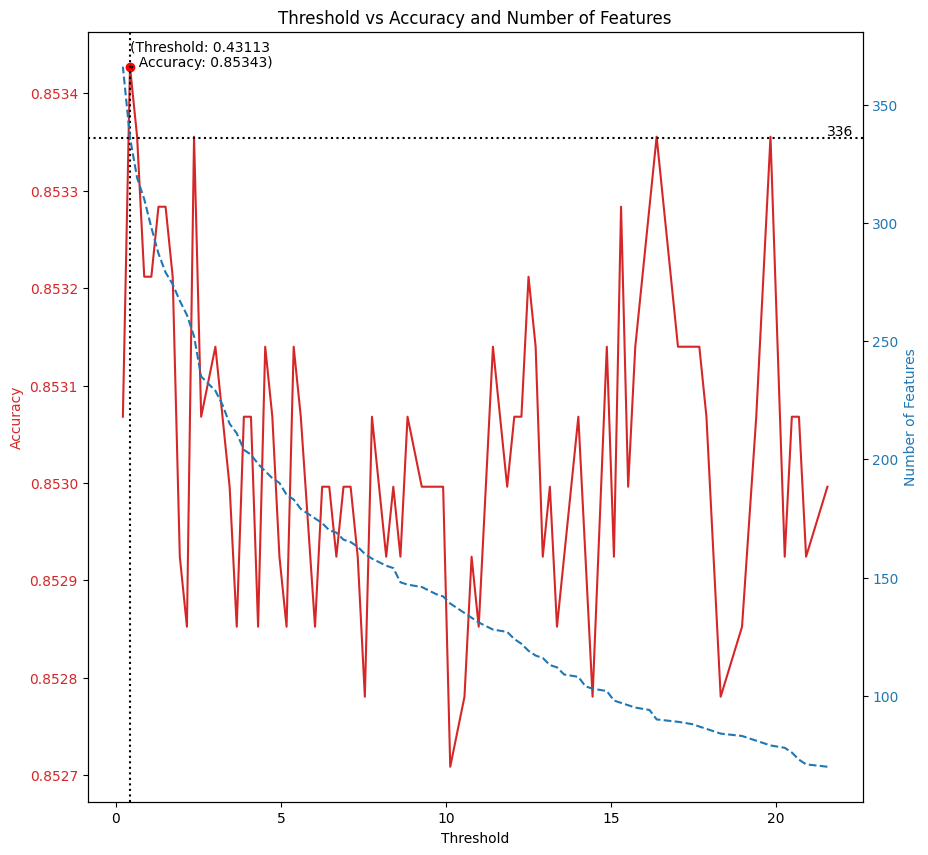

In [22]:
# plot the accuracy (left y axis) vs threshold
# plot the number of features (right y axis) vs threshold
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(list_th_chi2_limited, list_ac_chi2_limited, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.yaxis.set_ticks(np.arange(min_pt_limited, max_pt_limited + (max_pt_limited * 0.01), max_pt_limited * 0.0001))
ax1.plot(round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5), max_ac_chi2_limited, 'ro')
ax1.annotate(f"(Threshold: {best_th}\n, Accuracy: {round(max_ac_chi2_limited, 5)})", (round(list_th_chi2_limited[list_ac_chi2_limited.index(max_ac_chi2_limited)], 5), max_ac_chi2_limited))
# black dotted line at annotated point vertically
plt.axvline(x=best_th, color='black', linestyle='dotted')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Features', color=color)
ax2.plot(list_th_chi2_limited, list_num_feat_chi2_limited, color=color, linestyle='dashed')
# black dotted line at best_nf
plt.axhline(y=best_nf, color='black', linestyle='dotted')
ax2.annotate(f"{best_nf}", (max_th_chi2_limited, best_nf +1))
ax2.tick_params(axis='y', labelcolor=color)
# ax2.yaxis.set_ticks(np.arange(min_num_feat_chi2_limited, max_num_feat_chi2_limited + (max_num_feat_chi2_limited * 0.01), max_num_feat_chi2_limited * 0.1))
plt.title('Threshold vs Accuracy and Number of Features')
plt.savefig('outputs/00_feature_select/chi2_threshold_vs_accuracy_limited.png')
plt.show()

In [42]:
list_ac_chi2_limited.sort(reverse=True)
# Iterate through sorted list and print corresponding number of features
prv_list = []
for acc_score in list_ac_chi2_limited:
    for item in accuracy_scores_limited:
        if item[1] == acc_score:
            if (acc_score, item[2]) in prv_list:
                continue
            prv_list.append((acc_score, item[2]))
            prv_feat_num = item[2]
            # print(f"Acc: {round(acc_score,4)}, Num_feat: {item[2]}")
            break

# sort prv_list first by accuracy (decending) then where accuracy is the same, by number of features (ascending)
prv_list.sort(key=lambda x: (-x[0], x[1]))
prv_num = 0
for item in prv_list:
    if prv_num > item[1]:
        print("---")
    prv_num = item[1]
    print(f"Acc: {item[0]}, Num_feat: {item[1]}")

Acc: 0.8534272165541026, Num_feat: 336
---
Acc: 0.8533553671504526, Num_feat: 79
Acc: 0.8533553671504526, Num_feat: 90
Acc: 0.8533553671504526, Num_feat: 252
Acc: 0.8533553671504526, Num_feat: 319
---
Acc: 0.8532835177468028, Num_feat: 97
---
Acc: 0.8532835177468027, Num_feat: 94
Acc: 0.8532835177468027, Num_feat: 279
Acc: 0.8532835177468027, Num_feat: 287
---
Acc: 0.8532116683431528, Num_feat: 119
Acc: 0.8532116683431528, Num_feat: 274
Acc: 0.8532116683431528, Num_feat: 298
Acc: 0.8532116683431528, Num_feat: 310
---
Acc: 0.8531398189395027, Num_feat: 87
Acc: 0.8531398189395027, Num_feat: 88
Acc: 0.8531398189395027, Num_feat: 89
Acc: 0.8531398189395027, Num_feat: 95
Acc: 0.8531398189395027, Num_feat: 102
Acc: 0.8531398189395027, Num_feat: 117
Acc: 0.8531398189395027, Num_feat: 128
Acc: 0.8531398189395027, Num_feat: 183
Acc: 0.8531398189395027, Num_feat: 195
Acc: 0.8531398189395027, Num_feat: 229
---
Acc: 0.8530679695358528, Num_feat: 73
Acc: 0.8530679695358528, Num_feat: 76
Acc: 0.8530

### Mutual info class

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.004248
Feature 4: 0.004027
Feature 5: 0.002955
Feature 6: 0.000000
Feature 7: 0.001276
Feature 8: 0.002625
Feature 9: 0.000000
Feature 10: 0.003589
Feature 11: 0.003263
Feature 12: 0.000524
Feature 13: 0.000000
Feature 14: 0.004471
Feature 15: 0.002334
Feature 16: 0.001954
Feature 17: 0.000193
Feature 18: 0.002828
Feature 19: 0.003378
Feature 20: 0.000843
Feature 21: 0.004269
Feature 22: 0.000391
Feature 23: 0.000904
Feature 24: 0.000000
Feature 25: 0.001540
Feature 26: 0.000000
Feature 27: 0.002055
Feature 28: 0.003176
Feature 29: 0.003392
Feature 30: 0.000000
Feature 31: 0.007766
Feature 32: 0.001755
Feature 33: 0.003300
Feature 34: 0.000435
Feature 35: 0.001449
Feature 36: 0.002492
Feature 37: 0.002082
Feature 38: 0.003804
Feature 39: 0.002996
Feature 40: 0.004193
Feature 41: 0.000739
Feature 42: 0.002504
Feature 43: 0.002375
Feature 44: 0.003339
Feature 45: 0.000000
Feature 46: 0.000000
Feature 47: 0.000014
Fe

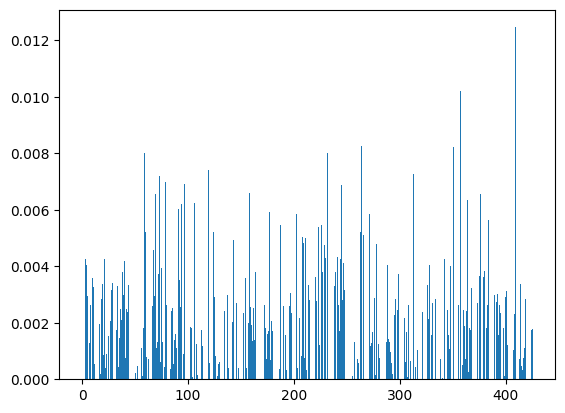

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.savefig('outputs/00_feature_select/feat_imp_mutual_info.png')
plt.show()

In [ ]:
# get the scores for the features and remove the nan values
scores = []
for i in range(len(fs.scores_)):
    if np.isnan(fs.scores_[i]):
        continue
    else:
        scores.append(fs.scores_[i])

# get the min and max scores
min_imp = min(scores)
max_imp = max(scores)
print(f"min: {min_imp}")
print(f"max: {max_imp}")

min: 0.0
max: 0.012459071332713512


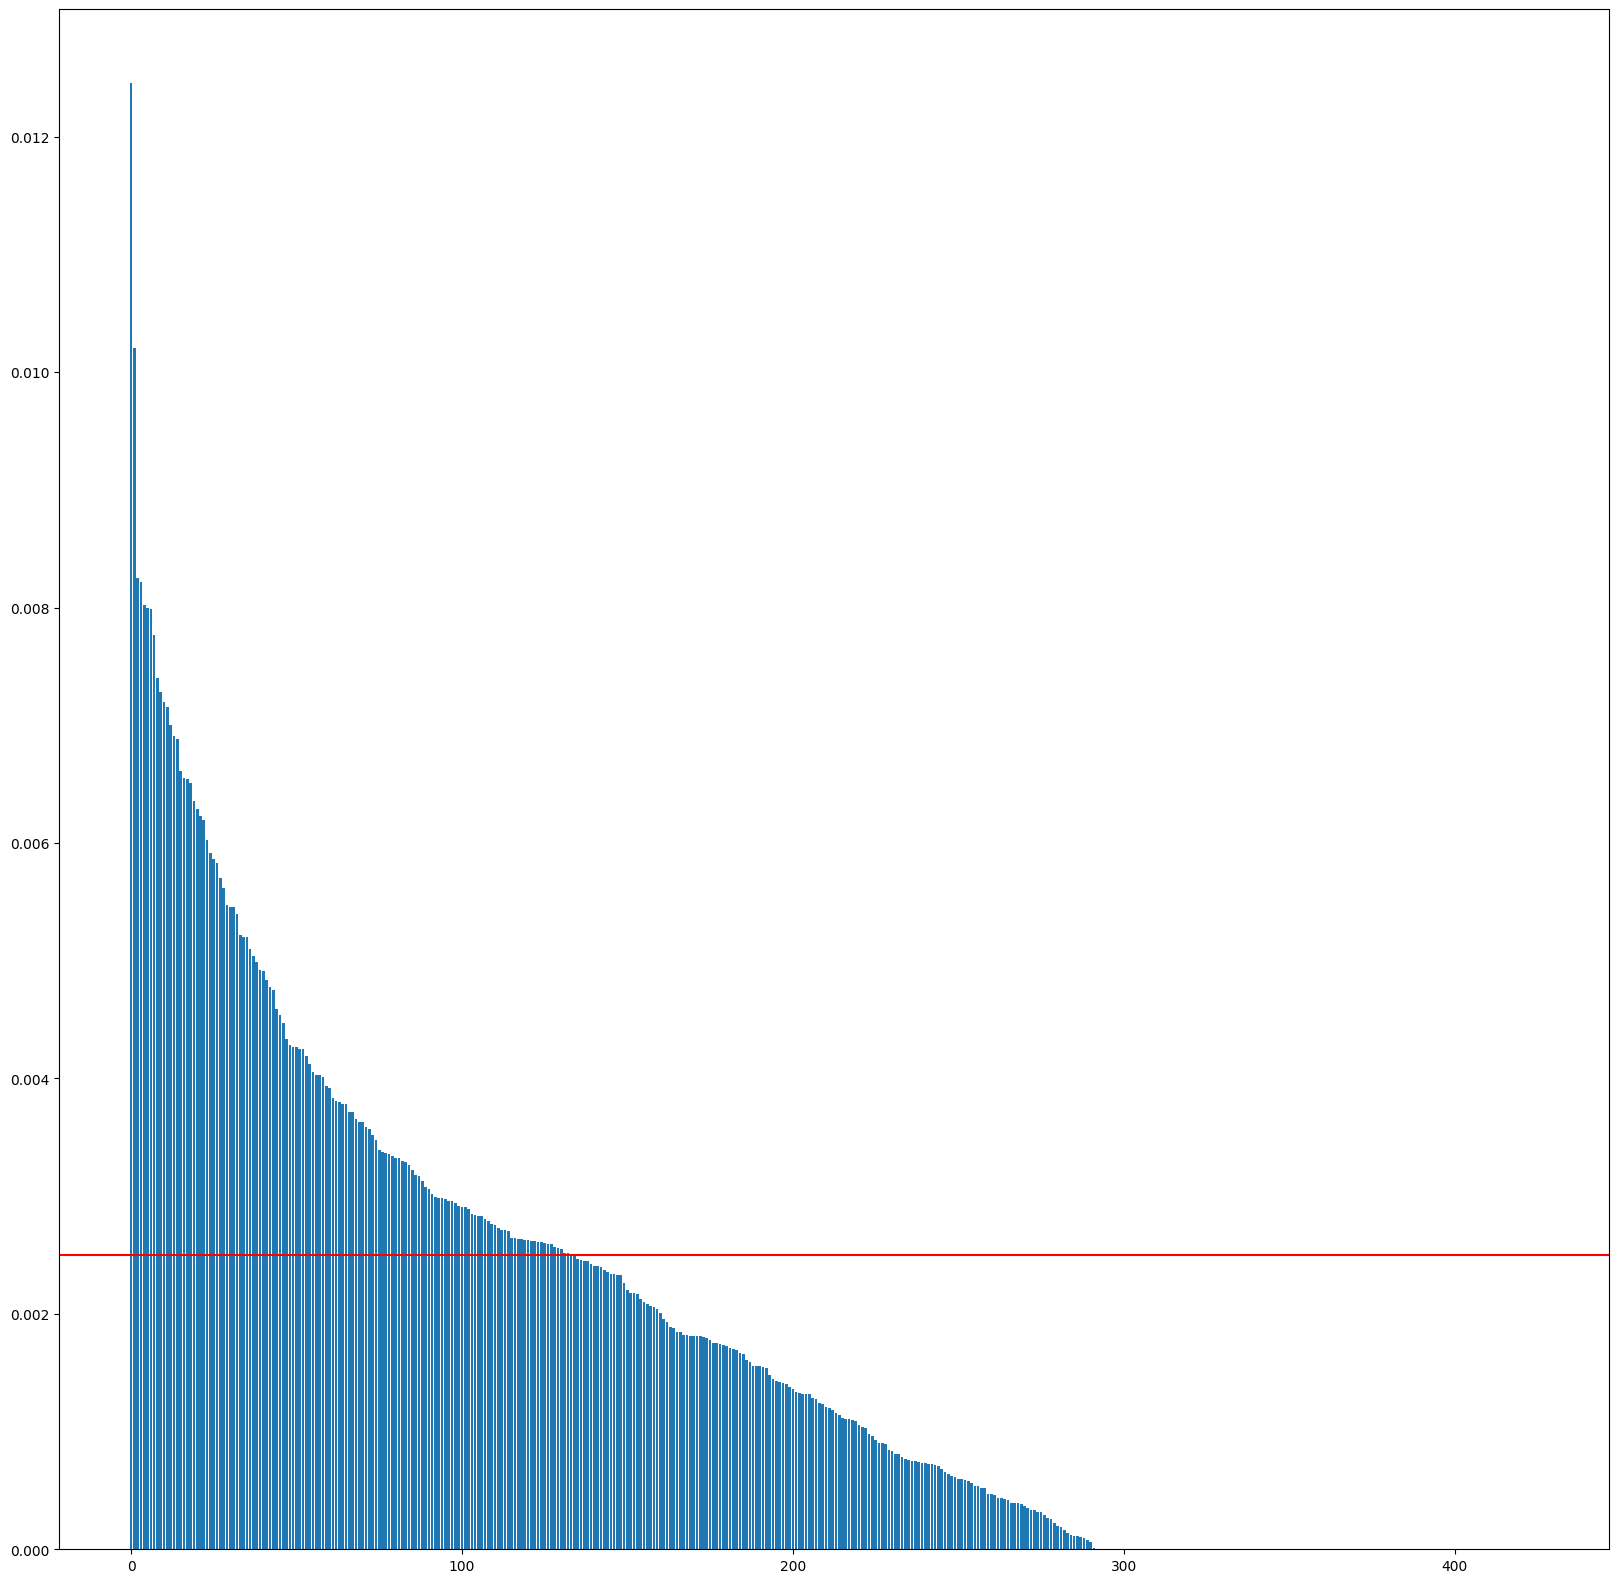

number of features with scores above the threshold: 134


In [ ]:
# sort the scores in descending order
scores.sort(reverse=True)

threshold = 0.0025 # corrosponds to AUROC of 0.25

# plot the scores
plt.figure(figsize=(20,20))
plt.bar([i for i in range(len(scores))], scores)
# draw a vertical line at the threshold
plt.axhline(y=threshold, color='r', linestyle='-')
plt.savefig('outputs/00_feature_select/feat_imp_mutual_info_sorted.png')
plt.show()

# get the number of features with scores above the threshold

num_features = len([i for i in scores if i > threshold])
print(f"number of features with scores above the threshold: {num_features}")


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)

In [ ]:
models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test)
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/1 trained with 
F1 score: 0.4641429253790244 
test accuracy: 0.8529 
train accuracy: 1.0000 
ROAUC: 0.6748730701379744 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.00      0.01      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.50      0.46      6959
weighted avg       0.87      0.85      0.79      6959


Elapsed time to compute Random Forest 1/1: 0 minutes and 3 seconds
average test accuracy: 0.852852421324903


In [ ]:
# difference between the max and threshold scores
range_mic =  max_imp - threshold
print(f"Range: {range_mic}")

Range: 0.009959071332713511


In [ ]:
accuracy_scores = [] # list to store the [0] threshold, [1] average test accuracy and [2] number of features
prev_num_feat = 0
for i in range(51):
    print(f"{i}:\n")
    threshold_itr = threshold + round((range_mic * i / 50), 4)
    print(f"Threshold: {threshold_itr}")
    num_features_itr = len([sc for sc in scores if sc > threshold_itr])
    print(f"number of features with scores above the threshold: {num_features_itr}")
    if prev_num_feat != num_features_itr:
        prev_num_feat = num_features_itr
    else:
        continue
    if num_features_itr == 0:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features_itr)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores.append((threshold_itr,np.mean(test_accuracies),num_features_itr))

0:

Threshold: 0.0025
number of features with scores above the threshold: 134
Forest 1/2 trained with 
F1 score: 0.47307663873893807 
test accuracy: 0.8541 
train accuracy: 1.0000 
ROAUC: 0.6890503763448267 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.51      0.47      6959
weighted avg       0.88      0.85      0.79      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 3 seconds
Forest 2/2 trained with 
F1 score: 0.47307663873893807 
test accuracy: 0.8541 
train accuracy: 1.0000 
ROAUC: 0.676577987977172 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      5931
           1       1.00      0.01      0.02      1028

    accuracy                           0.85      6959
   macro avg       0.93      0.51      0.47      6

In [ ]:
list_th_mic = [i[0] for i in accuracy_scores]
list_ac_mic = [i[1] for i in accuracy_scores]
list_num_feat_mic = [i[2] for i in accuracy_scores]

In [ ]:
# the min of accuracy or number of features
min_ac_mic = min(list_ac_mic)
min_num_feat_mic = min(list_num_feat_mic)
min_pt = min(min_ac_mic, min_num_feat_mic)
# the max of accuracy or number of features
max_ac_mic = max(list_ac_mic)
max_num_feat_mic = max(list_num_feat_mic)
max_pt = max(max_ac_mic, max_num_feat_mic)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_mic = min(list_th_mic)
max_th_mic = max(list_th_mic)

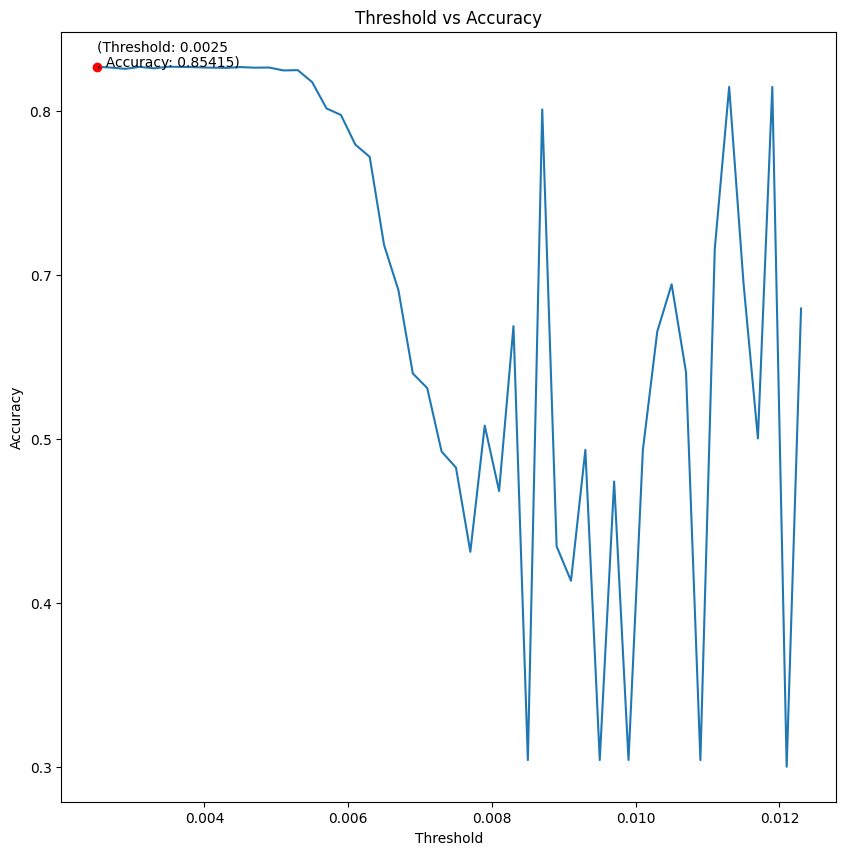

In [ ]:
# plot the accuracy scores
plt.figure(figsize=(10,10))
plt.plot(list_th_mic, list_ac_mic)
plt.yticks(np.arange(min_pt, max_pt + (max_pt * 0.01), max_pt * 0.001))
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
plt.plot(round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5), max_ac_mic, 'ro')
plt.annotate(f"(Threshold: {round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5)}\n, Accuracy: {round(max_ac_mic, 5)})", (round(list_th_mic[list_ac_mic.index(max_ac_mic)], 5), max_ac_mic))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.savefig('outputs/00_feature_select/mutual_info_threshold_vs_accuracy.png')
plt.show()

In [ ]:
# get the threshold for the max accuracy
th_max = [i[0] for i in accuracy_scores if i[1] == max_ac_mic][0]
print(f"Threshold for the max accuracy: {round(th_max, 5)}")

Threshold for the max accuracy: 0.0025


In [ ]:
low_min = th_max - min_th_mic
high_min = max_th_mic - th_max
if low_min < high_min:
    low_end = min_th_mic
    high_end = th_max + (low_min * 2)
    if low_min == 0:
        low_end = th_max
        high_end = th_max * 4
else:
    low_end = th_max - (high_min * 2)
    high_end = max_th_mic
    if high_min == 0:
        low_end = th_max / 4
        high_end = th_max

th = high_end
reduction = (high_end - low_end) / 10

accuracy_scores_limited = []
prev_num_feat = 0
while th > 0:
    print(f"Threshold: {th}")
    num_features = len([sc for sc in scores if sc > th])
    print(f"number of features with scores above the threshold: {num_features}")
    if prev_num_feat != num_features:
        prev_num_feat = num_features
    else:
        th -= reduction
        continue
    if th < low_end:
        break
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, num_features)
    models, test_accuracies = train_random_forests(X_train_fs, y_train, X_test_fs, y_test, 2)
    accuracy_scores_limited.append((th,np.mean(test_accuracies),num_features))
    print(f"average test accuracy: {np.mean(test_accuracies)}")
    th -= reduction

Threshold: 0.01
number of features with scores above the threshold: 2
Forest 1/2 trained with 
F1 score: 0.474157016459708 
test accuracy: 0.5874 
train accuracy: 0.5824 
ROAUC: 0.513941373132135 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      5931
           1       0.16      0.42      0.23      1028

    accuracy                           0.59      6959
   macro avg       0.51      0.52      0.47      6959
weighted avg       0.76      0.59      0.65      6959


Elapsed time to compute Random Forest 1/2: 0 minutes and 0 seconds
Forest 2/2 trained with 
F1 score: 0.474157016459708 
test accuracy: 0.5874 
train accuracy: 0.5824 
ROAUC: 0.513941373132135 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      5931
           1       0.16      0.42      0.23      1028

    accuracy                           0.59      6959
   macro avg       0.51      0.52      0.47      6959
weighted 

In [ ]:
list_th_mic_limited = [i[0] for i in accuracy_scores_limited]
list_ac_mic_limited = [i[1] for i in accuracy_scores_limited]
list_num_feat_mic_limited = [i[2] for i in accuracy_scores_limited]

In [ ]:
# the min of accuracy or number of features
min_ac_mic_limited = min(list_ac_mic_limited)
min_num_feat_mic_limited = min(list_num_feat_mic_limited)
min_pt_limited = min(min_ac_mic_limited, min_num_feat_mic_limited)
# the max of accuracy or number of features
max_ac_mic_limited = max(list_ac_mic_limited)
max_num_feat_mic_limited = max(list_num_feat_mic_limited)
max_pt_limited = max(max_ac_mic_limited, max_num_feat_mic_limited)

# min and max of the thresholds RECORDER not corrosponding to the min and max of the accuracy
min_th_mic_limited = min(list_th_mic_limited)
max_th_mic_limited = max(list_th_mic_limited)

In [ ]:
best_th = round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5)
best_nf = round(list_num_feat_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5)

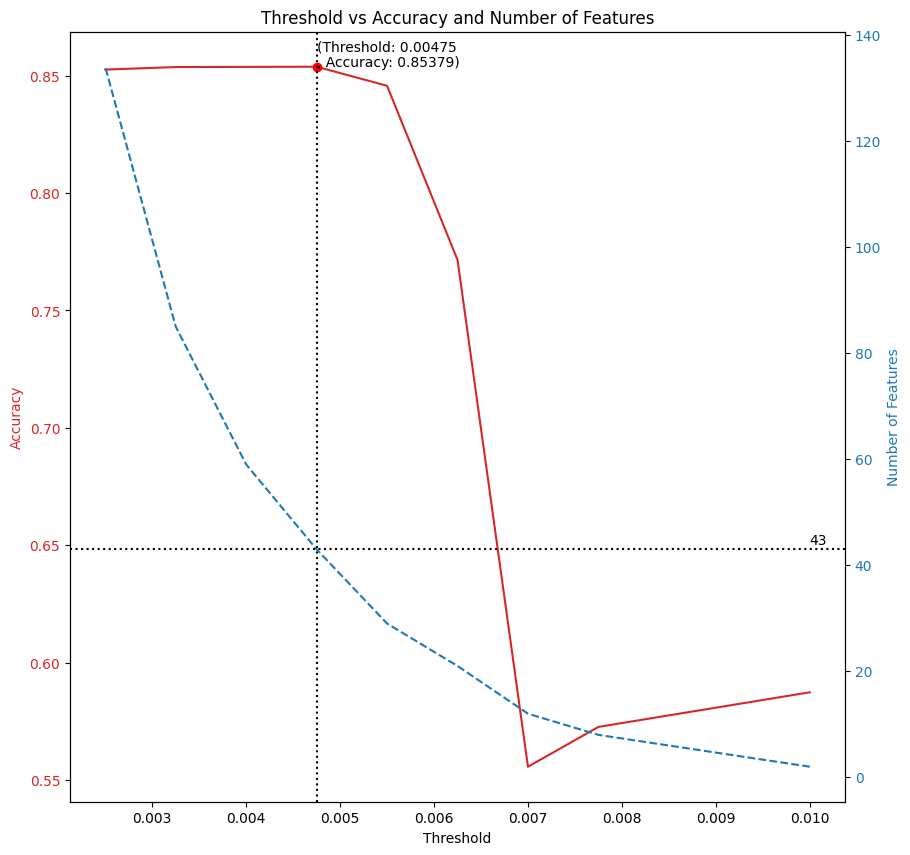

In [ ]:
# plot the accuracy (left y axis) vs threshold
# plot the number of features (right y axis) vs threshold
# red dot for the highest accuracy with the corresponding threshold rounded to 5 decimal places
fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(list_th_mic_limited, list_ac_mic_limited, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.yaxis.set_ticks(np.arange(min_pt_limited, max_pt_limited + (max_pt_limited * 0.01), max_pt_limited * 0.0001))
ax1.plot(round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5), max_ac_mic_limited, 'ro')
ax1.annotate(f"(Threshold: {best_th}\n, Accuracy: {round(max_ac_mic_limited, 5)})", (round(list_th_mic_limited[list_ac_mic_limited.index(max_ac_mic_limited)], 5), max_ac_mic_limited))
# black dotted line at annotated point vertically
plt.axvline(x=best_th, color='black', linestyle='dotted')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Features', color=color)
ax2.plot(list_th_mic_limited, list_num_feat_mic_limited, color=color, linestyle='dashed')
# black dotted line at best_nf
plt.axhline(y=best_nf, color='black', linestyle='dotted')
ax2.annotate(f"{best_nf}", (max_th_mic_limited, best_nf +1))
ax2.tick_params(axis='y', labelcolor=color)
# ax2.yaxis.set_ticks(np.arange(min_num_feat_mic_limited, max_num_feat_mic_limited + (max_num_feat_mic_limited * 0.01), max_num_feat_mic_limited * 0.1))
plt.title('Threshold vs Accuracy and Number of Features')
plt.savefig('outputs/00_feature_select/mutual_info_threshold_vs_accuracy_& features_limited.png')


In [ ]:
# print the features with scores above best threshold
print(f"Number of features: {best_nf}, Threshold: {best_th}")
for i in range(len(fs.scores_)):
    if fs.scores_[i] > best_th:
        print(f"Feature {i}: {fs.scores_[i]}, {fs.feature_names_in_[i]}")

Number of features: 43, Threshold: 0.00475
Feature 4: 0.004811208928436006, ('Q1- Your sex?_A man',)
Feature 73: 0.005649145670621136, ('Q13- Is the performance of your work taxing on you?-To work on screen_Most of the time',)
Feature 124: 0.00715158069815458, ('Q15- Indicate whether each of the following sentences suits you-I am satisfied with my work_Rather',)
Feature 146: 0.0057573532380506, ('Q15- Indicate whether each of the following sentences suits you-There is good understanding where I work_Rather',)
Feature 150: 0.0049779771936067085, ('Q15- Indicate whether each of the following sentences suits you-I have a well-suited workstation_Rather',)
Feature 158: 0.0056820921067339825, ('Q15- Indicate whether each of the following sentences suits you-My company takes care of the well-being of its employees_Rather',)
Feature 187: 0.0048758801404096275, ('Q17- At work, does it happen to you: (D-have decreased alertness, lack of attention_Sometimes',)
Feature 190: 0.008184797462750693, (